# HypTrails Runtime Tests
This notebook contains some simple runtime tests of different HypTrails implementations.

In [5]:
# imports
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
from pytrails.hyptrails.markovchain import *
from pytrails.hyptrails.markovchain_variants import MarkovChain as MarkovChainVariants

In [6]:
# a very small example
transition_counts = csr_matrix(
    [[1, 2, 3], 
     [4, 5, 6], 
     [7, 8, 9]],
    dtype=np.float64)
transition_probabilities = normalize(transition_counts, "l1", axis=1)
pseudo_counts = transition_probabilities * 5

In [7]:
runtime_reference = %timeit -o MarkovChain.marginal_likelihood(transition_counts, pseudo_counts)
runtime_reference_no_normalization = %timeit -o MarkovChain.marginal_likelihood(transition_counts, pseudo_counts, normalize_matrices=False)

runtime_vanilla = %timeit -o MarkovChainVariants.marginal_likelihood_vanilla(transition_counts, pseudo_counts)
runtime_masking = %timeit -o MarkovChainVariants.marginal_likelihood_masking(transition_counts, pseudo_counts)

414 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


381 µs ± 5.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


1.82 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


838 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<Container object of 4 artists>

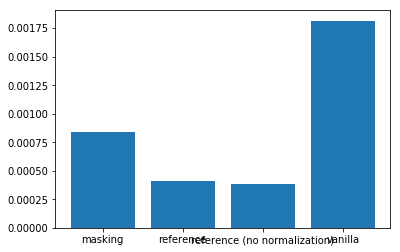

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(
    ['reference', 'reference (no normalization)', 'vanilla', 'masking'], 
    [runtime_reference.average, runtime_reference_no_normalization.average, runtime_vanilla.average, runtime_masking.average])